# Πρακτική Μηχανική Μάθηση – Εργασία 2020
 
Ράπτη Χαρίκλεια - ΜΕ1941


# Α' Ερώτημα


### Εισαγωγή όλων των απαιτούμενων βιβλιοθηκών

In [20]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
%matplotlib inline

### Εισάγουμε το σύνολο δεδομένων CSV χρησιμοποιώντας pandas και βλέπουμε τις 5 πρώτες εγγραφές

In [21]:
dataset = pd.read_csv(r'C:\Users\xara_\Downloads\auction_data.csv')
dataset.head()

,SellerId,SellerRating,ItemId,StartingBid,Price,NumBidders
0,144.0,84.11,6.0,137.0,145.5,2.0
1,40.0,93.76,0.0,30.0,30.0,0.0
2,102.0,94.52,12.0,364.0,1278.0,8.0
3,77.0,97.41,2.0,82.0,106.5,3.0
4,54.0,80.32,4.0,173.0,173.0,0.0


### Ελέγχουμε τον αριθμό των σειρών και στηλών στο σύνολο δεδομένων μας

In [22]:
dataset.shape

(18842, 6)

### Ελέγχουμε αν υπάρχουν κενές τιμές (NaN) στο σύνολο δεδομένων μας

In [23]:
dataset.isnull().values.any()

False

### Στατιστικές λεπτομέρειες του συνόλου δεδομένων μας

In [24]:
dataset.describe()

,SellerId,SellerRating,ItemId,StartingBid,Price,NumBidders
count,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000
mean,75.340834,90.046164,5.998779,316.835899,393.979753,2.242172
std,43.636179,6.009262,3.731892,350.345270,384.044470,2.016307
min,0.000000,80.050000,0.000000,1.000000,1.250000,0.000000
25%,37.000000,84.820000,3.000000,80.000000,135.500000,0.000000
50%,76.000000,90.460000,6.000000,181.000000,235.500000,2.000000
75%,113.000000,94.990000,9.000000,426.000000,568.000000,4.000000
max,149.000000,99.980000,12.000000,2299.000000,2299.000000,10.000000


In [25]:
print(list(dataset.columns))

['SellerId', ' SellerRating', ' ItemId', ' StartingBid', ' Price', ' NumBidders']


In [26]:
#dataset.head()
dataset[' ItemId'].dtypes

dtype('float64')

In [27]:
dataset[' ItemId'] = dataset[' ItemId'].astype('category')
dataset[' SellerId'] = dataset['SellerId'].astype('category')
dataset.dtypes

SellerId          float64
 SellerRating     float64
 ItemId          category
 StartingBid      float64
 Price            float64
 NumBidders       float64
 SellerId        category
dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset[' ItemId'] = le.fit_transform(dataset[' ItemId'],)
dataset['SellerId'] = le.fit_transform(dataset['SellerId'])
dataset.head(10)


,SellerId,SellerRating,ItemId,StartingBid,Price,NumBidders,SellerId
0,144,84.11,6,137.0,145.5,2.0,144.0
1,40,93.76,0,30.0,30.0,0.0,40.0
2,102,94.52,12,364.0,1278.0,8.0,102.0
3,77,97.41,2,82.0,106.5,3.0,77.0
4,54,80.32,4,173.0,173.0,0.0,54.0
5,62,99.97,12,836.0,1146.0,4.0,62.0
6,12,99.01,8,207.0,599.0,4.0,12.0
7,62,99.97,8,348.0,529.0,3.0,62.0
8,116,99.26,2,18.0,100.0,7.0,116.0
9,144,84.11,0,8.0,24.5,4.0,144.0


In [30]:
dataset.dtypes

SellerId            int64
 SellerRating     float64
 ItemId             int64
 StartingBid      float64
 Price            float64
 NumBidders       float64
 SellerId        category
dtype: object

### Κανονικοποίηση με χρήση της κλάσης StandardScaler
που βρίσκεται στο module sklearn.preprocessing. Η μέθοδος fit_transform της StandardScaler υπολογίζει τον μετασχηματισμό της κανονικοποίησης (μέσες, μέγιστες, ελάχιστες τιμές στηλών) και επιστρέφει τον μετασχηματισμένο πίνακα

In [32]:
sc = StandardScaler()
dataset = pd.DataFrame(sc.fit_transform(dataset), columns = dataset.columns)
dataset.head()

,SellerId,SellerRating,ItemId,StartingBid,Price,NumBidders,SellerId
0,1.573488,-0.987862,0.000327,-0.513324,-0.647025,-0.120110,1.573488
1,-0.809919,0.618035,-1.607479,-0.818745,-0.947779,-1.112049,-0.809919
2,0.610958,0.744510,1.608133,0.134625,2.301931,2.855707,0.610958
3,0.038024,1.225447,-1.071544,-0.670316,-0.748578,0.375860,0.038024
4,-0.489076,-1.618572,-0.535608,-0.410566,-0.575417,-1.112049,-0.489076


In [33]:
dataset.dtypes

SellerId         float64
 SellerRating    float64
 ItemId          float64
 StartingBid     float64
 Price           float64
 NumBidders      float64
 SellerId        float64
dtype: object

### Συσχέτιση των δεδομένων

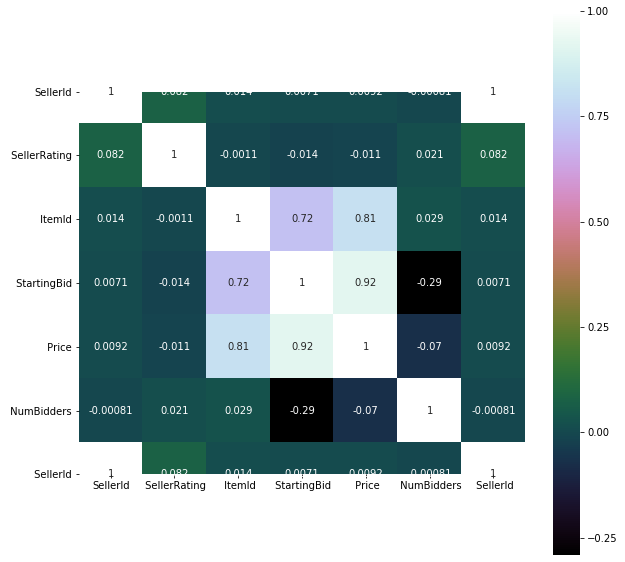

In [15]:
correlation = dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

###  Χωρίζουμε τα δεδομένα σε «χαρακτηριστικά» και «ετικέτες»
Η μεταβλητή X περιέχει όλα τα χαρακτηριστικά  και η μεταβλητή y περιέχει ετικέτες.

In [248]:
X = dataset[[' NumBidders',' StartingBid',' SellerRating',' ItemId','SellerId' ]]
y = dataset[' Price']

#### Χωρίζουμε το σύνολο δεδομένων μας σε train και test
Διαιρούμε το 80% των δεδομένων στο σύνολο εκπαίδευσης, ενώ το 20% των δεδομένων στο σύνολο δοκιμών χρησιμοποιώντας τον παρακάτω κώδικα

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Εκπαίδευση του Αλγόριθμου Multi-Linear Regression
Για να εκπαιδεύσουμε τον αλγόριθμο χρησιμοποιούμε τη fit()μέθοδο της LinearRegression κλάσης

In [250]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Βέλτιστοι συντελεστές για όλα τα χαρακτηριστικά

Εδώ βλέπουμε ποιους συντελεστές έχει επιλέξει το μοντέλο.
Το αποτέλεσμα που παίρνουμε σημαίνει ότι για μια αύξηση μονάδας στην Τιμή Εκκίνησης (StartingBid), υπάρχει μια αύξηση σχεδόν μονάδας Τιμή Κλεισίματος (Price). Μπορούμε να δούμε ότι η Βαθμολογία Πωλητή % (SellerRating)
 και το Πλήθος Συμμετεχόντων (NumBidders) έχουν πολύ μικρή επίδραση στην Τιμή Κλεισίματος.

In [251]:
coeff_dataset = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_dataset

,Coefficient
NumBidders,0.158847
StartingBid,0.802637
SellerRating,-0.002018
ItemId,0.233809
SellerId,0.000767


### Προβλέψεις για τα δεδομένα δοκιμής

In [252]:
y_pred = regressor.predict(X_test)

### Ελέγχουμε τη διαφορά μεταξύ της πραγματικής και της προβλεπόμενης τιμής

In [253]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head()
df1

,Actual,Predicted
4123,-0.286380,-0.213487
4373,2.109239,2.258846
651,-0.428294,-0.366565
15944,-0.527244,-0.248141
18493,-0.600154,-0.510735


### Σχεδιάζουμε τη σύγκριση των Πραγματικών και Προβλεπόμενων τιμών
Όπως μπορούμε να παρατηρήσουμε από το ραβδόγραμμα, το μοντέλο μας επέστρεψε αρκετά καλά αποτελέσματα πρόβλεψης.

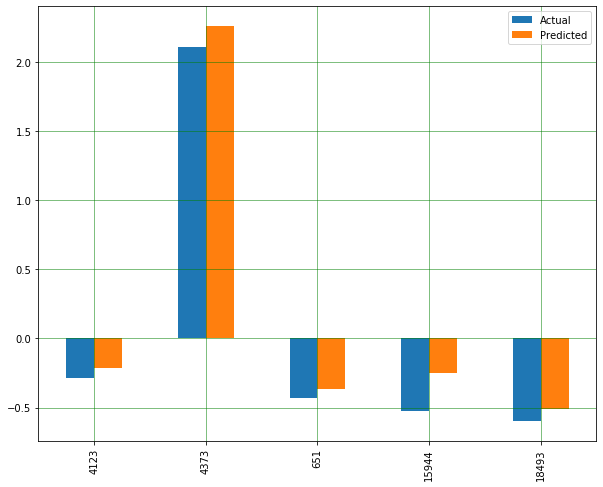

In [254]:
df1.plot (kind = 'bar', figsize = (10,8)) 
plt.grid (which = 'major', linestyle = '-', linewidth = '0.5', color = 'green') 
plt.grid (which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show ()

### Αξιολόγηση αλγορίθμου Multi-Linear Regression
Το τελευταίο βήμα είναι η αξιολόγηση της απόδοσης του αλγορίθμου. Θα το κάνουμε αυτό βρίσκοντας τις τιμές για MAE , MSE και RMSE.
Παρατηρούμε από τα αποτελέσματα οτι η τιμή της ρίζας του μέσου τετραγωνικού σφάλματος (RMSE) είναι 0.274 , επομένως έχει καλή εφαρμογή το μοντέλο μας, τα παρατηρούμενα σημεία δεδομένων βρίσκονται πολύ κοντά στις προβλεπόμενες τιμές του μοντέλου. Επιπλέον το μέσο τετραγωνικό σφάλμα (MSE) είναι 0.075 , που σημαίνει ότι ο αλγόριθμός μας ήταν πολύ ακριβής, και μπορεί να κάνει αρκετά καλές προβλέψεις.

In [255]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.17578716290745752
Mean Squared Error: 0.0755474235970424
Root Mean Squared Error: 0.27485891580416744


### Εκπαίδευση του Αλγόριθμου Random_Forest_Regressor
Η RandomForestRegressor κλάση της sklearn.ensemble βιβλιοθήκης χρησιμοποιείται για την επίλυση προβλημάτων παλινδρόμησης μέσω τυχαίων δέντρων . Η πιο σημαντική παράμετρος της RandomForestRegressor κλάσης είναι η n_estimators παράμετρος. Αυτή η παράμετρος καθορίζει τον αριθμό των δέντρων στο random forest. Θα ξεκινήσουμε για n_estimator=20να δούμε πώς αποδίδει ο αλγόριθμός μας.

In [256]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### Αξιολόγηση αλγορίθμου Random_Forest_Regressor
Το τελευταίο βήμα είναι η αξιολόγηση της απόδοσης του αλγορίθμου. Θα το κάνουμε αυτό βρίσκοντας τις τιμές για MAE , MSE και RMSE.
Παρατηρούμε από τα αποτελέσματα οτι με 20 δέντρα η τιμή της ρίζας του μέσου τετραγωνικού σφάλματος (RMSE) είναι 0.077 , επομένως έχει καλή εφαρμογή το μοντέλο μας, τα παρατηρούμενα σημεία δεδομένων βρίσκονται πολύ κοντά στις προβλεπόμενες τιμές του μοντέλου. Επιπλέον το μέσο τετραγωνικό σφάλμα (MSE) είναι 0.005 , που σημαίνει ότι ο αλγόριθμός μας ήταν ακριβής, και μπορεί να κάνει αρκετά καλές προβλέψεις.

In [257]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.033015809372173285
Mean Squared Error: 0.005991444543177985
Root Mean Squared Error: 0.07740442198723523


# Β' Ερώτημα


### Εισάγουμε μία νέα στήλη "Sold"
Όταν ικανοποιείται η παρακάτω συνθήκη (δηλαδή εάν έχει γίνει πώληση), μπαίνει στη στήλη "Sold" το 1, σε αντίθετη περίπτωση μπαίνει το 0.

In [258]:
dataset[' Sold'] = np.where((dataset[' StartingBid']!=dataset[' Price']) & (dataset[' NumBidders']>0), 1, 0)

In [259]:
dataset.head()

,SellerId,SellerRating,ItemId,StartingBid,Price,NumBidders,SellerId,Sold
0,1.573488,-0.987862,0.000327,-0.513324,-0.647025,-0.120110,1.573488,0
1,-0.809919,0.618035,-1.607479,-0.818745,-0.947779,-1.112049,-0.809919,0
2,0.610958,0.744510,1.608133,0.134625,2.301931,2.855707,0.610958,1
3,0.038024,1.225447,-1.071544,-0.670316,-0.748578,0.375860,0.038024,1
4,-0.489076,-1.618572,-0.535608,-0.410566,-0.575417,-1.112049,-0.489076,0


### Αφαίρεση στηλών
Αφαιρούμε τις στήλες "Price" και "NumBidders" λόγω της συσχέτισης που μας δίνουν αλλά και λόγω του accuracy που προκύπτει παρακάτω.

In [260]:
dataset   = dataset.drop(' Price', axis =1)
dataset   = dataset.drop(' NumBidders', axis =1)

In [261]:
dataset.head()

,SellerId,SellerRating,ItemId,StartingBid,SellerId,Sold
0,1.573488,-0.987862,0.000327,-0.513324,1.573488,0
1,-0.809919,0.618035,-1.607479,-0.818745,-0.809919,0
2,0.610958,0.744510,1.608133,0.134625,0.610958,1
3,0.038024,1.225447,-1.071544,-0.670316,0.038024,1
4,-0.489076,-1.618572,-0.535608,-0.410566,-0.489076,0


###  Χωρίζουμε τα δεδομένα σε «χαρακτηριστικά» και «ετικέτες»
Αυτή τη φορά μας ενδιαφέρει η ετικέτα "Sold" για να κατηγοριοποιήσουμε τα δεδομένα μας.

In [262]:
X = dataset[['SellerId',' SellerRating', ' StartingBid', ' ItemId']]
y = dataset[' Sold']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Εκπαίδευση του Αλγόριθμου SVM
Επιλέγουμε SVC αλγόριθμο με πολυωνυμικό kernel 2ου βαθμού.

In [264]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', C = 5.0, degree = 2, gamma = 2.0, coef0 = 10)
svclassifier.fit(X_train, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=10,
    decision_function_shape='ovr', degree=2, gamma=2.0, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [265]:
y_pred = svclassifier.predict(X_test)

### Αξιολόγηση SVM αλγορίθμου
Από τα παρακάτω αποτελέσματα παρατηρούμε οτι έχουμε accuracy (ακρίβεια) 0.716 το οποίο είναι ένα σχετικά καλό αποτέλεσμα.

In [266]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(svclassifier.score(X_test, y_test))

[[1597  490]
 [ 577 1105]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      2087
           1       0.69      0.66      0.67      1682

    accuracy                           0.72      3769
   macro avg       0.71      0.71      0.71      3769
weighted avg       0.72      0.72      0.72      3769

0.71690103475723


### Εκπαίδευση του Αλγόριθμου KNN

In [267]:
from sklearn.neighbors        import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2, algorithm = 'kd_tree', p = 2, metric = 'minkowski', weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [268]:
pred = knn.predict(X_test)

### Αξιολόγηση ΚΝΝ αλγορίθμου
Από τα παρακάτω αποτελέσματα παρατηρούμε οτι έχουμε accuracy (ακρίβεια) 0.801 το οποίο είναι ένα καλό αποτέλεσμα, και μάλιστα καλύτερο από του SVC αλγόριθμου.

In [269]:
from sklearn.metrics import classification_report, confusion_matrix
print(knn.score(X_test, y_test))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

0.8012735473600424
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      2087
           1       0.78      0.77      0.78      1682

    accuracy                           0.80      3769
   macro avg       0.80      0.80      0.80      3769
weighted avg       0.80      0.80      0.80      3769

[[1729  358]
 [ 391 1291]]




# Γ' Ερώτημα


In [271]:
dataset = pd.read_csv(r'C:\Users\xara_\Downloads\auction_data.csv')
dataset.head()

,SellerId,SellerRating,ItemId,StartingBid,Price,NumBidders
0,144.0,84.11,6.0,137.0,145.5,2.0
1,40.0,93.76,0.0,30.0,30.0,0.0
2,102.0,94.52,12.0,364.0,1278.0,8.0
3,77.0,97.41,2.0,82.0,106.5,3.0
4,54.0,80.32,4.0,173.0,173.0,0.0


In [272]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = pd.DataFrame(sc.fit_transform(dataset), columns = dataset.columns)
dataset.head()

,SellerId,SellerRating,ItemId,StartingBid,Price,NumBidders
0,1.573488,-0.987862,0.000327,-0.513324,-0.647025,-0.120110
1,-0.809919,0.618035,-1.607479,-0.818745,-0.947779,-1.112049
2,0.610958,0.744510,1.608133,0.134625,2.301931,2.855707
3,0.038024,1.225447,-1.071544,-0.670316,-0.748578,0.375860
4,-0.489076,-1.618572,-0.535608,-0.410566,-0.575417,-1.112049


###  Χωρίζουμε τα δεδομένα σε «χαρακτηριστικά» και «ετικέτες»
Αυτή τη φορά μας ενδιαφέρει η "Τιμή εκκίνησης" (StartingBid) οπότε αυτή θα είναι και η "y" μεταβλητή μας.
Δεν επιλέγω τα SellerId και ItemId, γιατί χωρίς αυτά έχουμε καλύτερα αποτελέσματα.

In [273]:
X = dataset[[' NumBidders',' Price',' SellerRating']]
y = dataset[' StartingBid']

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Εφαρμόζουμε Random Forest & Decision Tree αλγόριθμο

In [275]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred_startRF = regressor.predict(X_test)

In [276]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X_train, y_train) 
y_pred_startDT = regressor.predict(X_test)

### Εφαρμόζω ξανά Random Forest Regressor & Decision Tree, αυτή τη φορά για να προβλέψω την τελική τιμή (Price)
Δεν επιλέγω πάλι τα SellerId και ItemId, γιατί χωρίς αυτά έχουμε καλύτερα αποτελέσματα.

In [277]:
X = dataset[[' NumBidders',' SellerRating',' StartingBid']]
y = dataset[' Price']

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [279]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred_priceRF = regressor.predict(X_test)

In [280]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X_train, y_train) 
y_pred_priceDT = regressor.predict(X_test)

In [281]:
expected_valueRF = sum((y_pred_priceRF - y_pred_startRF) / y_pred_startRF) / len(y_pred_priceRF)
expected_valueRF

0.30352700180641673

In [282]:
expected_valueDT = sum((y_pred_priceDT - y_pred_startDT) / y_pred_startDT) / len(y_pred_priceDT)
expected_valueDT

0.20548373342120044

#### O Random forest αλγόριθμος επέστρεψε καλύτερο ποσοστό κέρδους 30.3% σε σχέση με το Decision Tree που επέστρεψε 20.5%